In [68]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Understanding the Datasets

In [69]:
data = pd.read_csv('/Users/maryamzad/street_levels/student_lifestyle_dataset.csv')
data.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [70]:
data.drop_duplicates(inplace=True)
print('Null cells: ', data.isnull().sum().sum())
print("Duplicate Rows: ", data.duplicated().sum())

Null cells:  0
Duplicate Rows:  0


In [71]:
data.shape

(2000, 8)

In [72]:
data.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [73]:
# examine our y variable
np.unique(data["Stress_Level"], return_counts=True)

(array(['High', 'Low', 'Moderate'], dtype=object), array([1029,  297,  674]))

In [74]:
# columns 
data.columns

Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')

In [75]:
# Check for any missing values (no missing values)
data.isnull().sum()

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

In [76]:
data

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


In [77]:
### see which variables are most closely related 
# encode the categorical variable to numerical for correlation check
data['Stress_Level'] = data['Stress_Level'].map({'Low': 30, 'Moderate': 40, 'High': 50})
correlation_matrix = data.corr()
stress_correlations = correlation_matrix['Stress_Level']
print(stress_correlations)

Student_ID                         0.003306
Study_Hours_Per_Day                0.738843
Extracurricular_Hours_Per_Day     -0.006099
Sleep_Hours_Per_Day               -0.298917
Social_Hours_Per_Day              -0.054702
Physical_Activity_Hours_Per_Day   -0.205207
GPA                                0.550395
Stress_Level                       1.000000
Name: Stress_Level, dtype: float64


# Data Visualization


/var/folders/yd/p6hvs29537q2mn162wlst19m0000gn/T/ipykernel_44002/3233648894.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Stress_Level_Label', y='Study_Hours_Per_Day', order = category_order, palette=custom_palette)


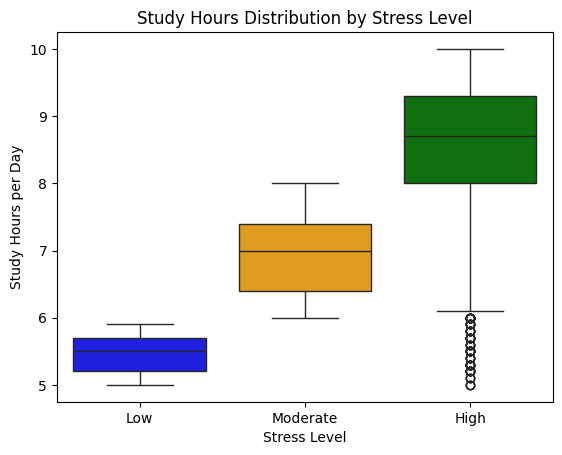

In [89]:
stress_mapping = {30: 'Low', 40: 'Moderate', 50: 'High'}
data['Stress_Level_Label'] = data['Stress_Level'].map(stress_mapping)
category_order = ['Low', 'Moderate', 'High']
custom_palette = {'Low': 'blue', 'Moderate': 'orange', 'High': 'green'}
sns.boxplot(data=data, x='Stress_Level_Label', y='Study_Hours_Per_Day', order = category_order, palette=custom_palette)
plt.title('Study Hours Distribution by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Study Hours per Day')
plt.show()

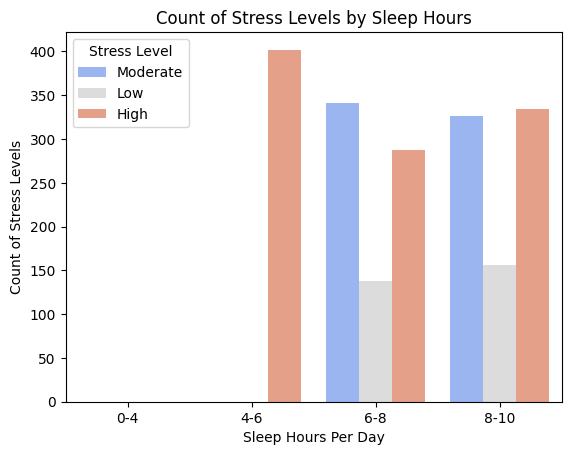

In [96]:
stress_mapping = {30: 'Low', 40: 'Moderate', 50: 'High'}
data['Stress_Level_Label'] = data['Stress_Level'].map(stress_mapping)
bins = [0, 4, 6, 8, 10]  
labels = ['0-4', '4-6', '6-8', '8-10']  
data['Sleep_Hours_Binned'] = pd.cut(data['Sleep_Hours_Per_Day'], bins=bins, labels=labels, right=False)
sns.countplot(data=data, x='Sleep_Hours_Binned', hue='Stress_Level_Label', palette='coolwarm')
plt.title('Count of Stress Levels by Sleep Hours')
plt.xlabel('Sleep Hours Per Day')
plt.ylabel('Count of Stress Levels')
plt.legend(title='Stress Level')

# Data Cleaning

In [40]:
selected_data = data.drop(columns = ['Extracurricular_Hours_Per_Day', 'Student_ID' ])
selected_data.columns


Index(['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')

# Model Building 